In [1]:
import seaborn as sns

df = sns.load_dataset("tips")
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
#**2.Understanding the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
#**stats sum
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


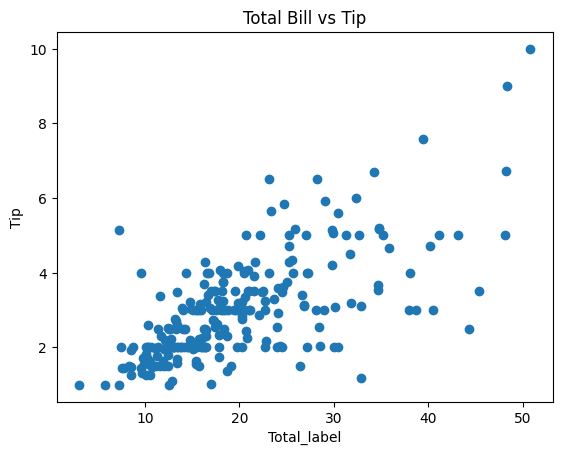

In [4]:
#**4relationship check before using any model we must confirm relationship 
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"], df["tip"])
plt.xlabel("Total_label")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

1.as the bill increases tip increases

2.relationship=straight line(we can use linear regression )

4.Feature and Target Seperation

In [5]:
x=df[["total_bill"]]
y=df["tip"]

5.Train Test Split

A model must perform best on unseen data

test_size=0.2 i.e 20% of data is for testing remaining is for training

random_state=42 i.e out of 80% 42 records are taken for training

80%->training

20%->testing

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                        test_size=0.2,
                        random_state=42)


6.Feature Standardization

Compare the coefficients fairly

Avoid the dominance of large values

Prepare for ridge and lasso

IMP:

1.Fit only on training data

2.Prevents the data leakage

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

7.Train Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-Efficient (m) :",model.coef_[0])
print("Intercept (c) :",model.intercept_)
y_pred=model.predict(x_test_scaled)

Co-Efficient (m) : 0.9357171400271826
Intercept (c) : 3.0877948717948724


In [11]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred) 
print("R2 Score:",r2)

R2 Score: 0.5449381659234664


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse) 
print("RMSE:",rmse)

MSE: 0.5688142529229538
RMSE: 0.7541977545199626


In [13]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

MAE: 0.6208580000398983


In [14]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred)
print("MAPE:",mape)

MAPE: 0.26395165529907566


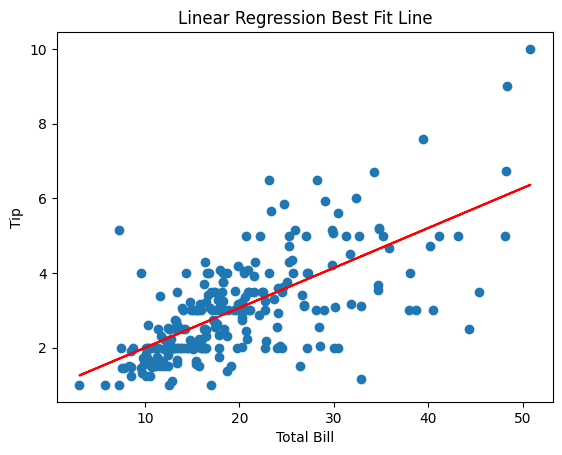

In [15]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit Line")
plt.show()

In [16]:
bill_amount=float(input("Enter the bill amount :"))
bill_scaled=scaler.transform([[bill_amount]])
tip_amount=model.predict(bill_scaled)
print(f"Predicted Tip : {tip_amount[0]:.2f}")

Predicted Tip : 107.89


/Users/shivanimareddy/Desktop/Machine_learning/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
